<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week09/dbscan_and_agglomerativeclustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

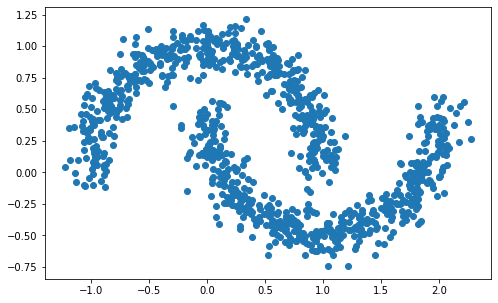

In [10]:
# Make the moons
moons = make_moons(n_samples = 1000, noise = 0.1, random_state = 42)[0]
plt.figure(figsize = (8, 5));
plt.scatter(moons[:, 0], moons[:, 1]);

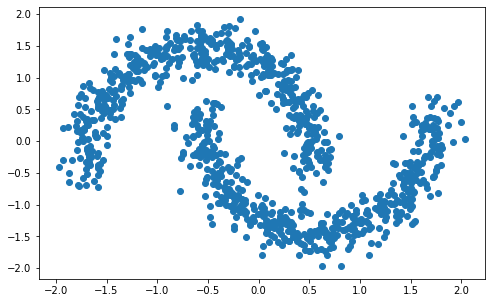

In [14]:
# Scale the data
moons = StandardScaler().fit_transform(moons)
plt.figure(figsize = (8, 5));
plt.scatter(moons[:, 0], moons[:, 1]);

In [20]:
# Find the nearest neighbors
min_samples = 30
neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors.fit(moons)
distances, indices = neighbors.kneighbors(moons)

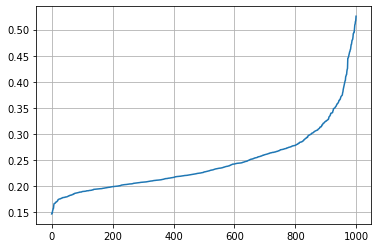

In [24]:
# Sort and plot the distances
sorted_distances = np.sort(distances[:, min_samples - 1])
plt.plot(sorted_distances)
plt.grid()

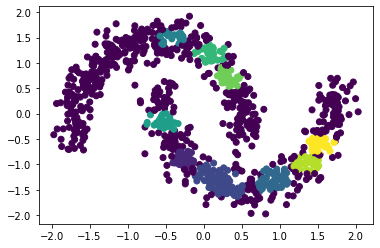

In [26]:
# Construct a DBSCAN model with eps = 0.18 and plot the clusters
dbs = DBSCAN(eps = 0.18, min_samples = min_samples).fit(moons)
plt.scatter(moons[:, 0], moons[:, 1], c = dbs.labels_)

> This did not cluster the moons as desired. We will try eps = 0.28

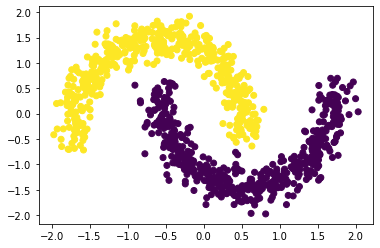

In [34]:
# Construct a DBSCAN model with eps = 0.36 and plot the clusters
dbs = DBSCAN(eps = 0.36, min_samples = min_samples).fit(moons)
plt.scatter(moons[:, 0], moons[:, 1], c = dbs.labels_)

> We tried the values 0.28, 0.3, 0.32, 0.33, 0.34, 0.35, and 0.36. The value 0.36 for eps is the one that separates the clusters completely.

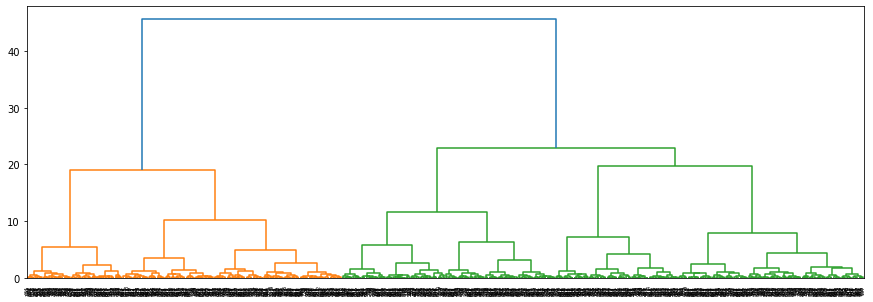

In [41]:
# Create a dendrogram
plt.figure(figsize = (15, 5));
sch.dendrogram(sch.linkage(moons, method = 'ward'));

In [44]:
# The dendrogram seems to suggest two clusters. (Good thing!)
agc = AgglomerativeClustering(n_clusters = 2)
agc.fit(moons)

AgglomerativeClustering()

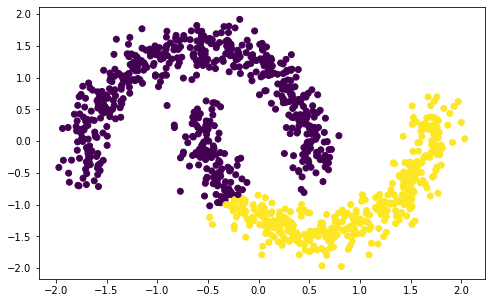

In [46]:
# Plot the agglomerative clusters
plt.figure(figsize = (8, 5));
plt.scatter(moons[:, 0], moons[:, 1], c = agc.labels_)

> As we can see, the density clustering achieved the desired result, where agglomerative clustering did not.